In [ ]:
import torch

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [ ]:
%cd /content/drive/MyDrive/dataset
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=100 imgsz=640 plots=True

/content/drive/MyDrive/Vehicles
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, wo

In [ ]:
!ls runs/detect/train6/

args.yaml					    R_curve.png       train_batch630.jpg
confusion_matrix.png				    results.csv       train_batch631.jpg
events.out.tfevents.1716836773.fb63fa8d4b67.8915.0  results.png       train_batch632.jpg
F1_curve.png					    train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					    train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					    train_batch2.jpg  weights


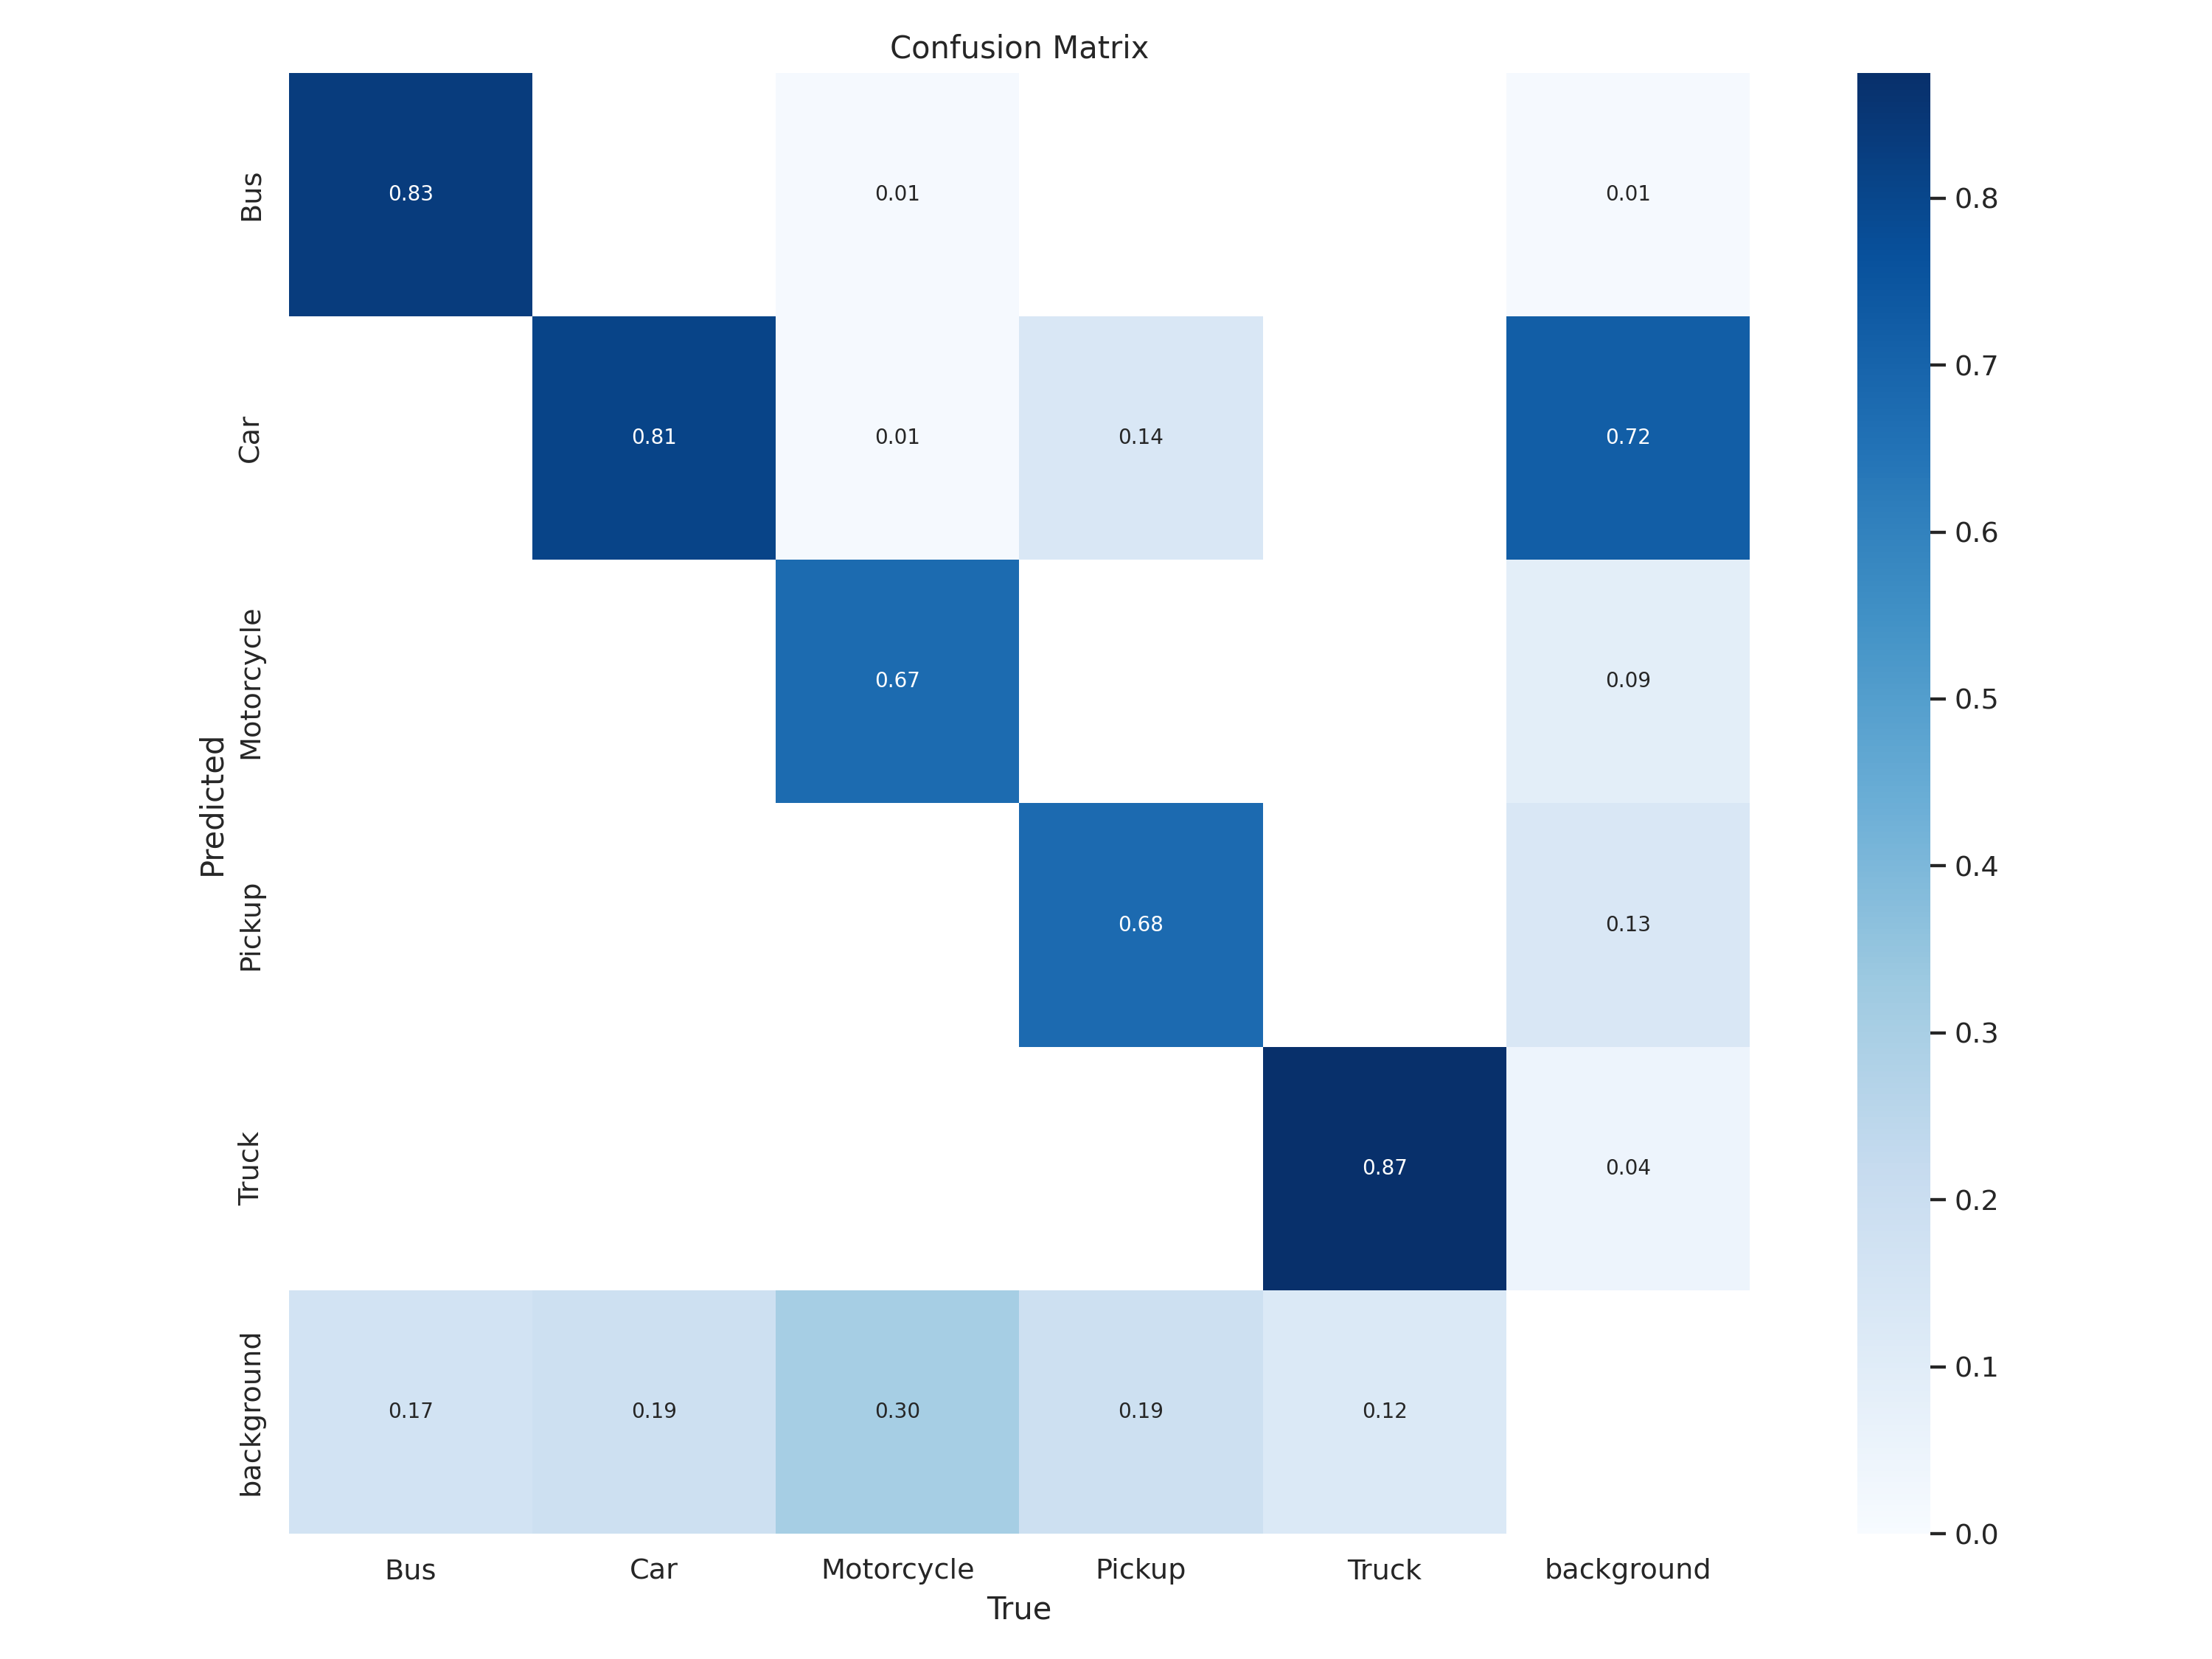

In [ ]:
Image(filename='runs/detect/train6/confusion_matrix.png', width=600)

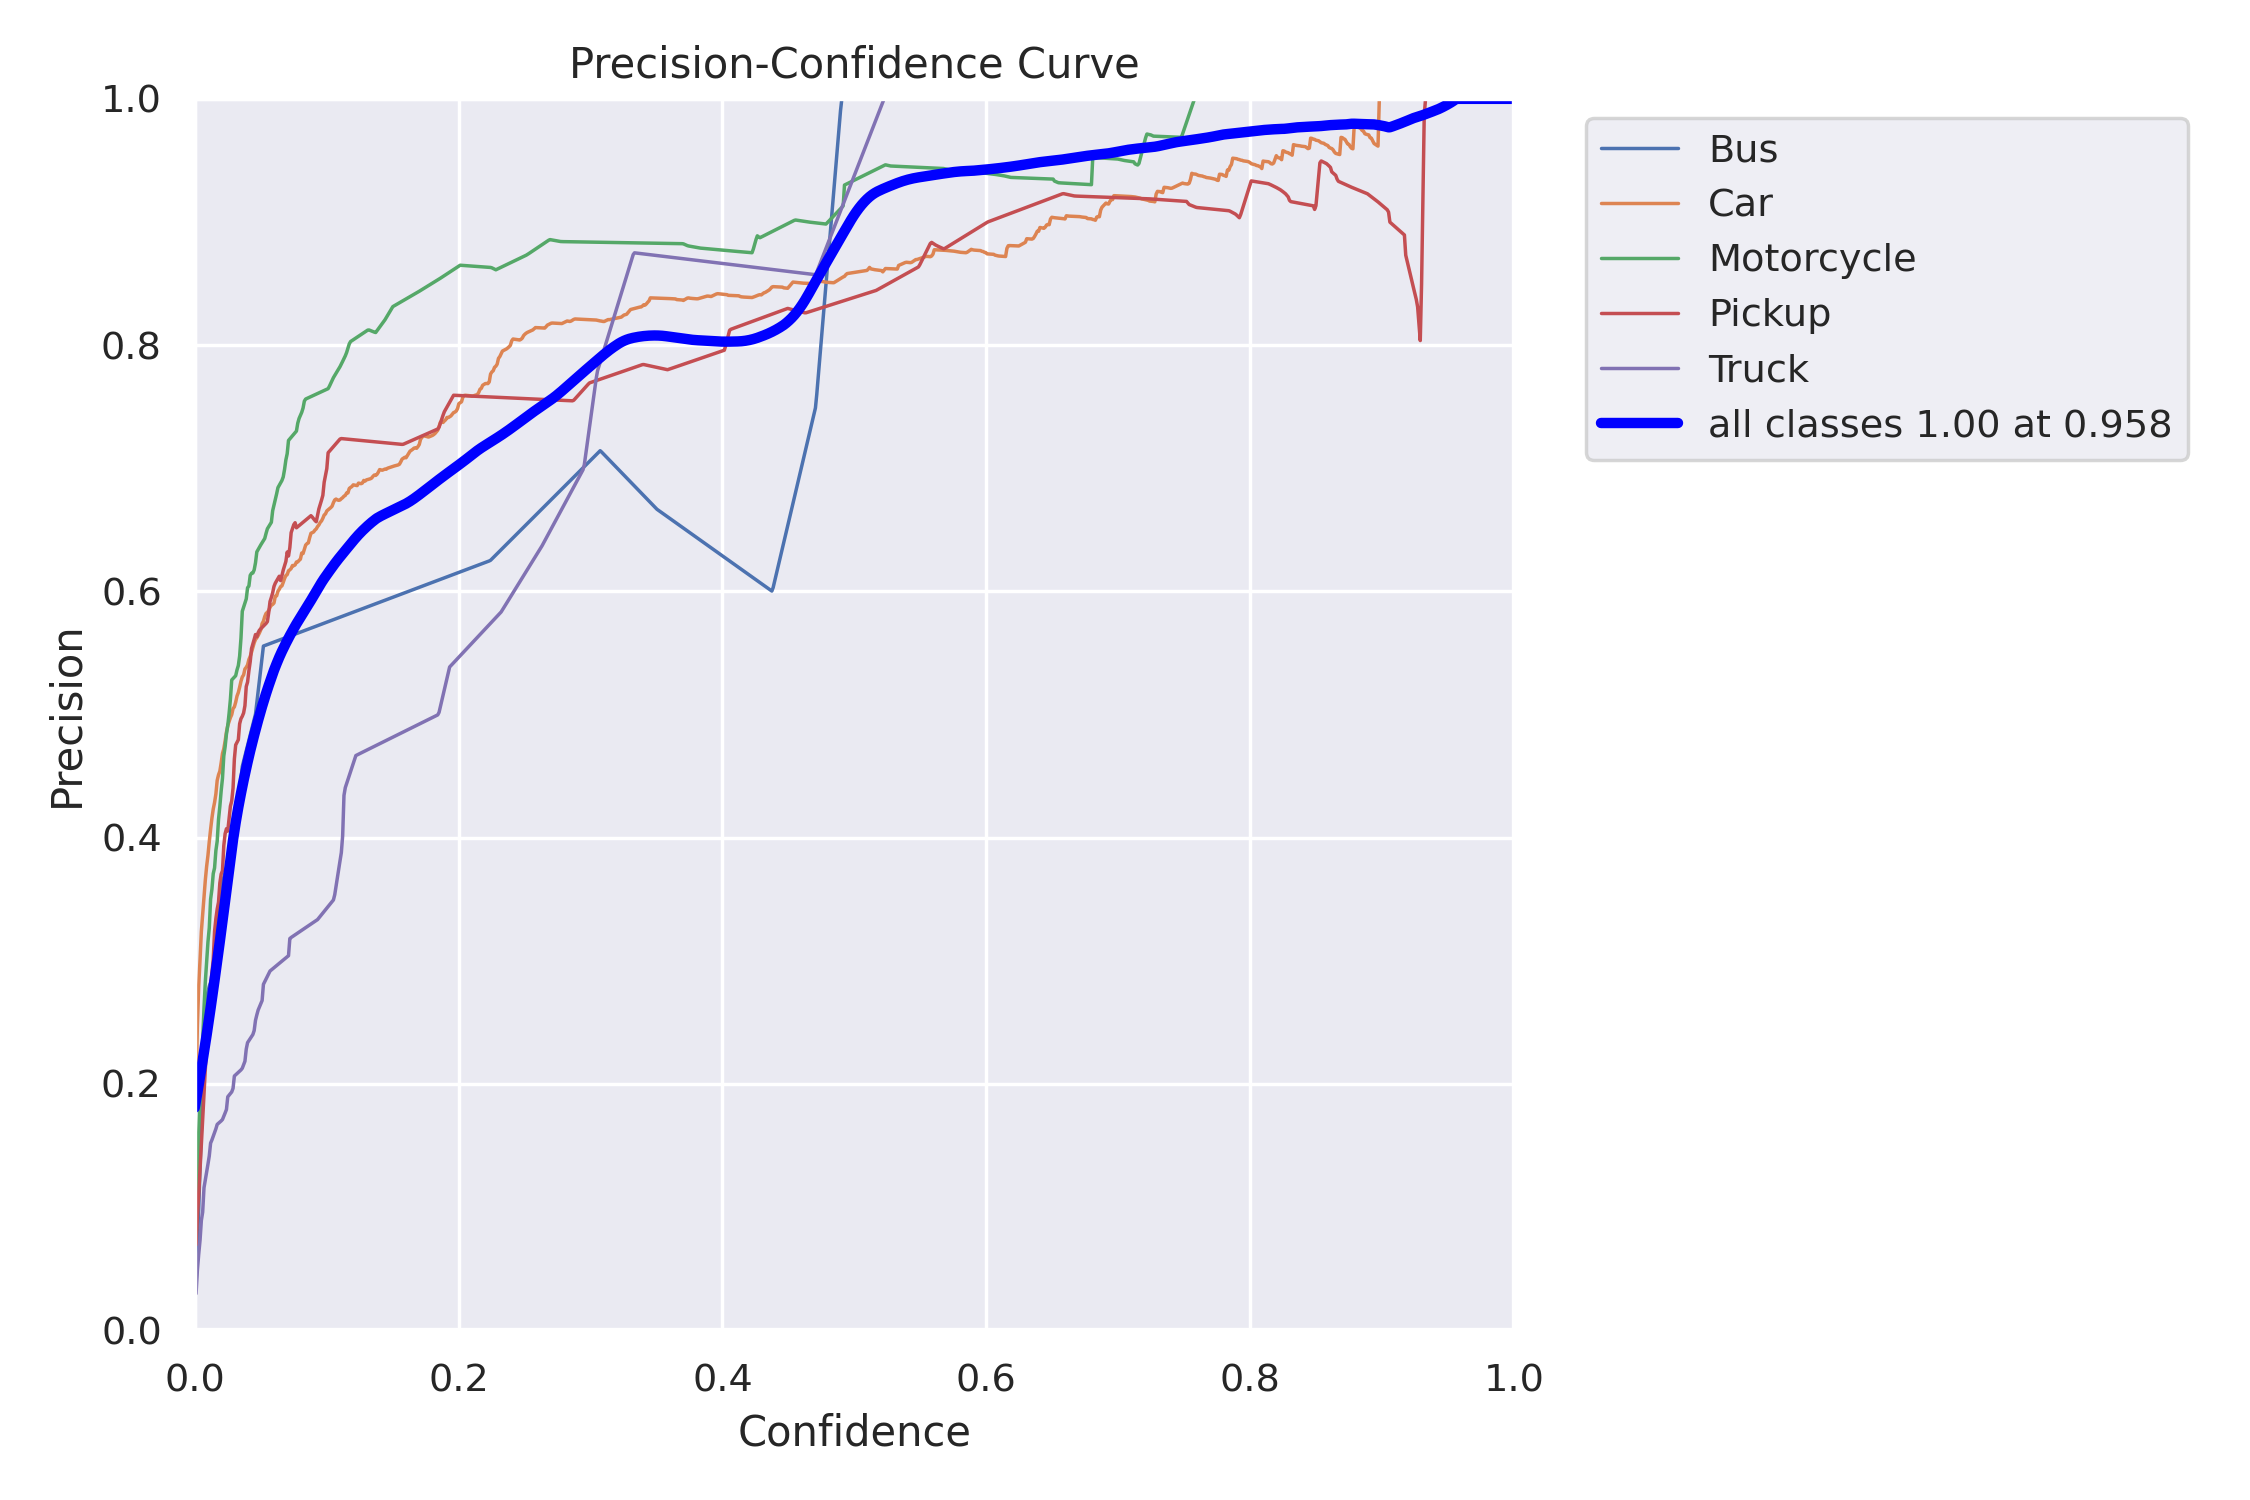

In [ ]:
Image(filename='runs/detect/train6/P_curve.png', width=600)

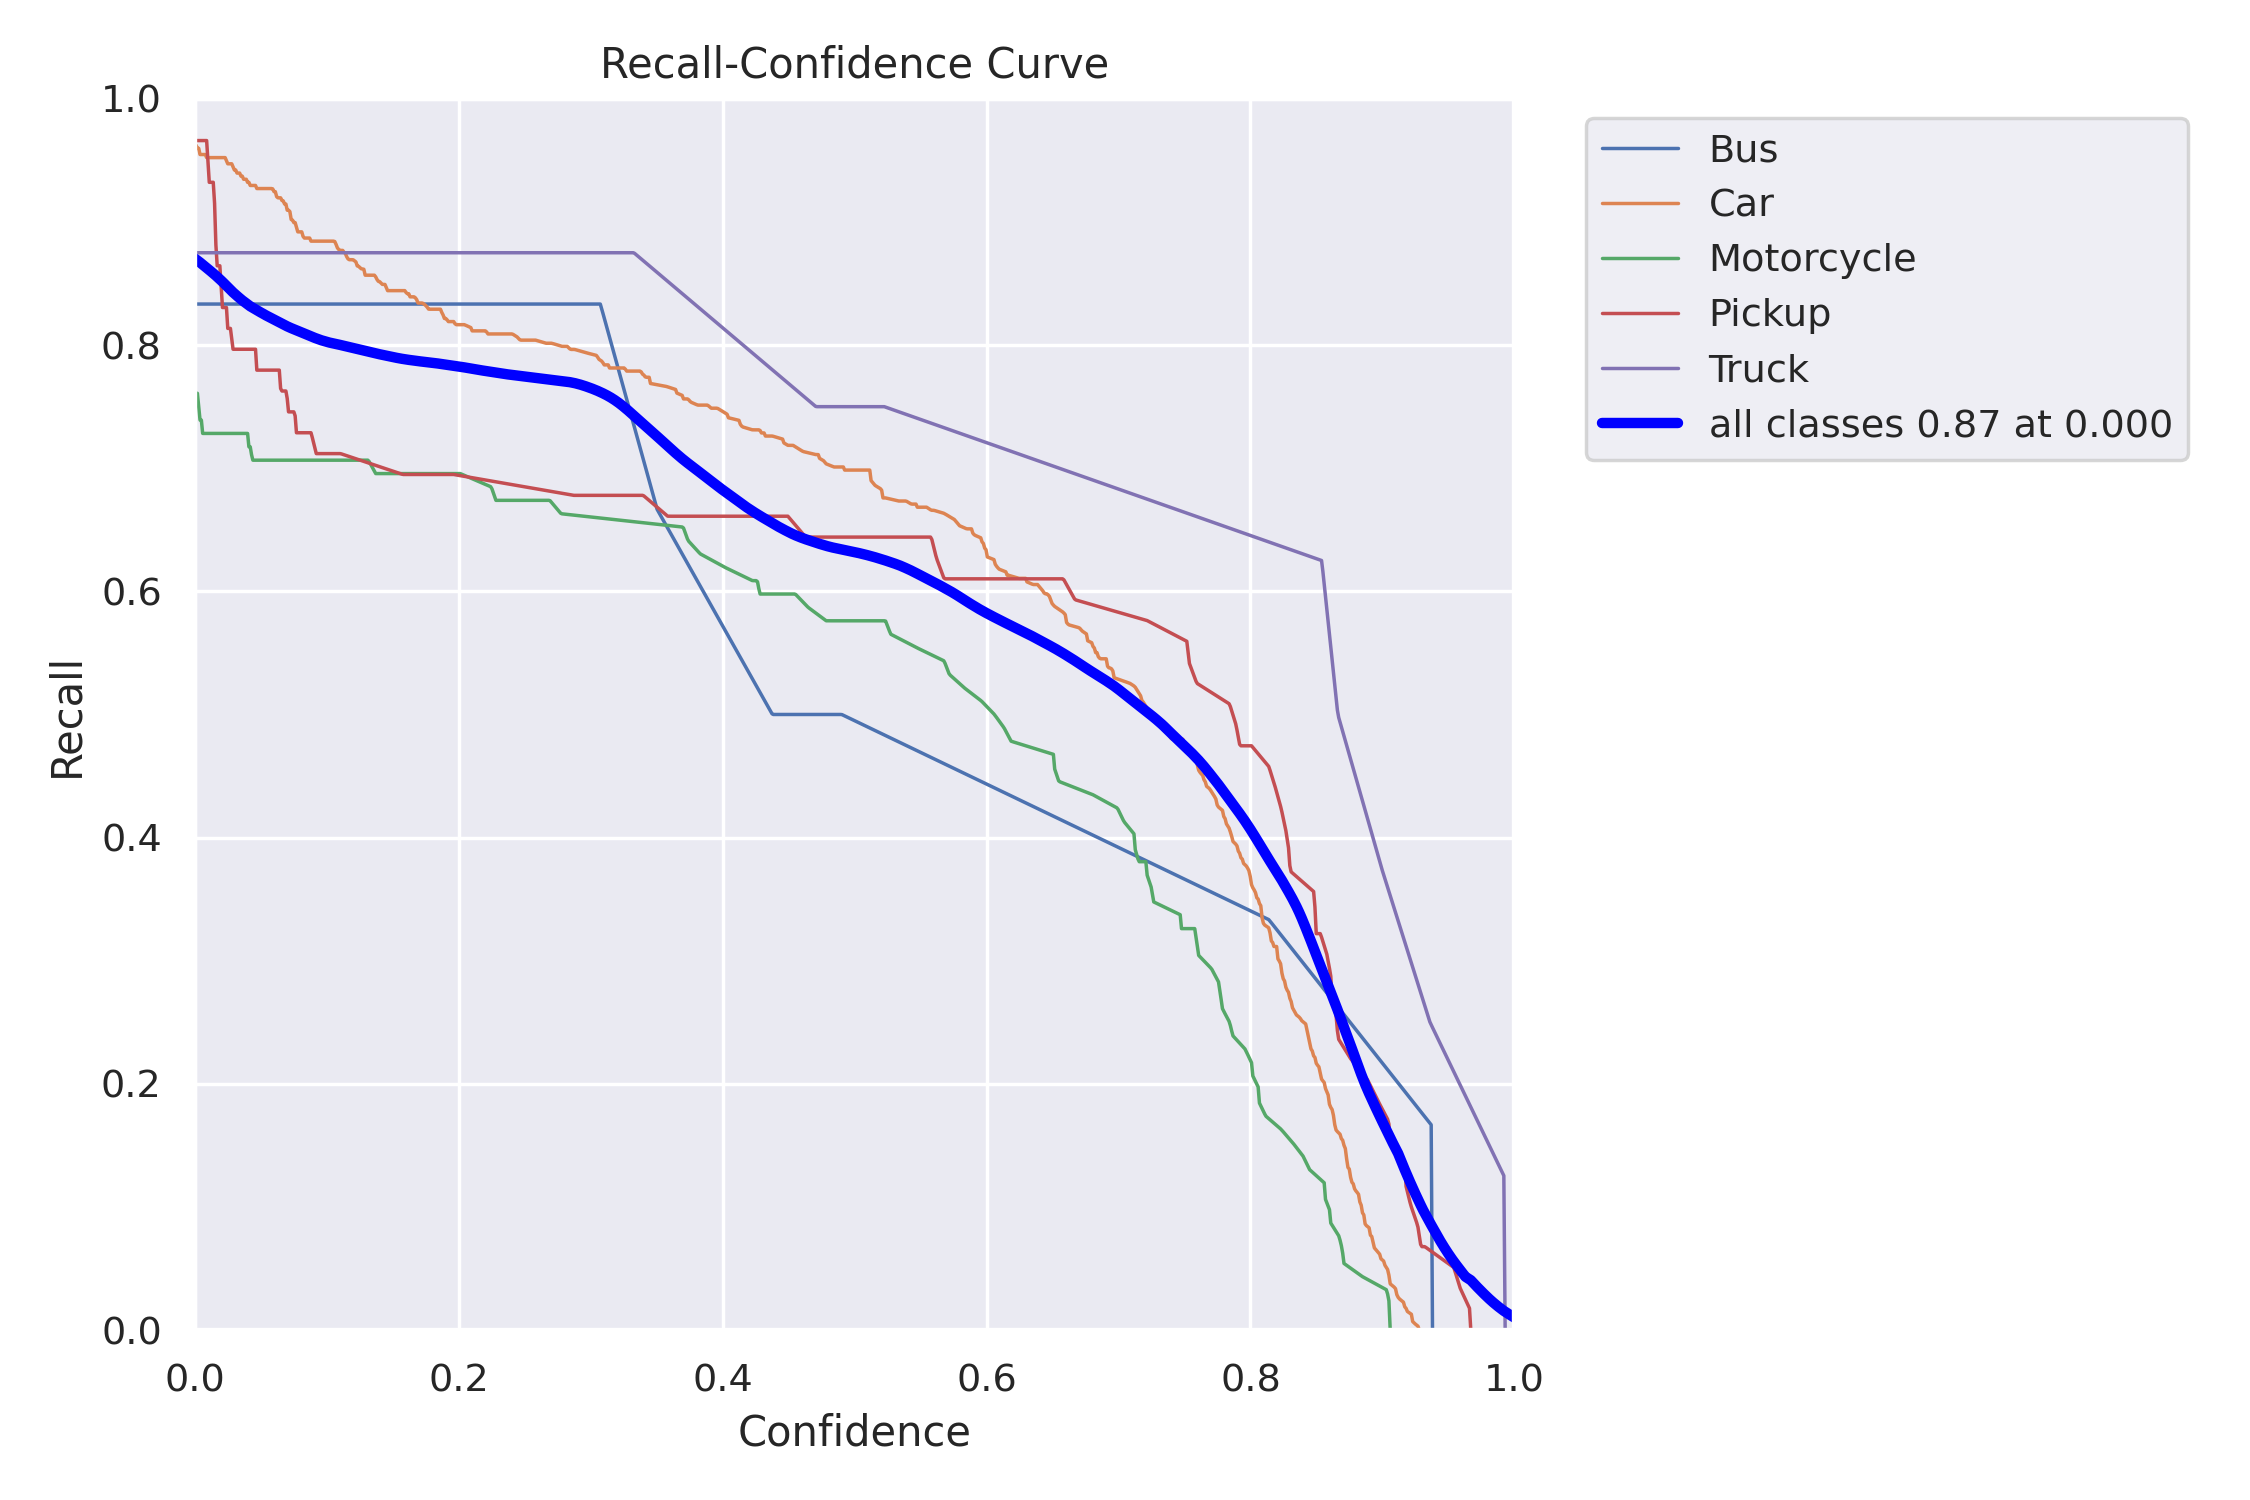

In [ ]:
Image(filename='runs/detect/train6/R_curve.png', width=600)

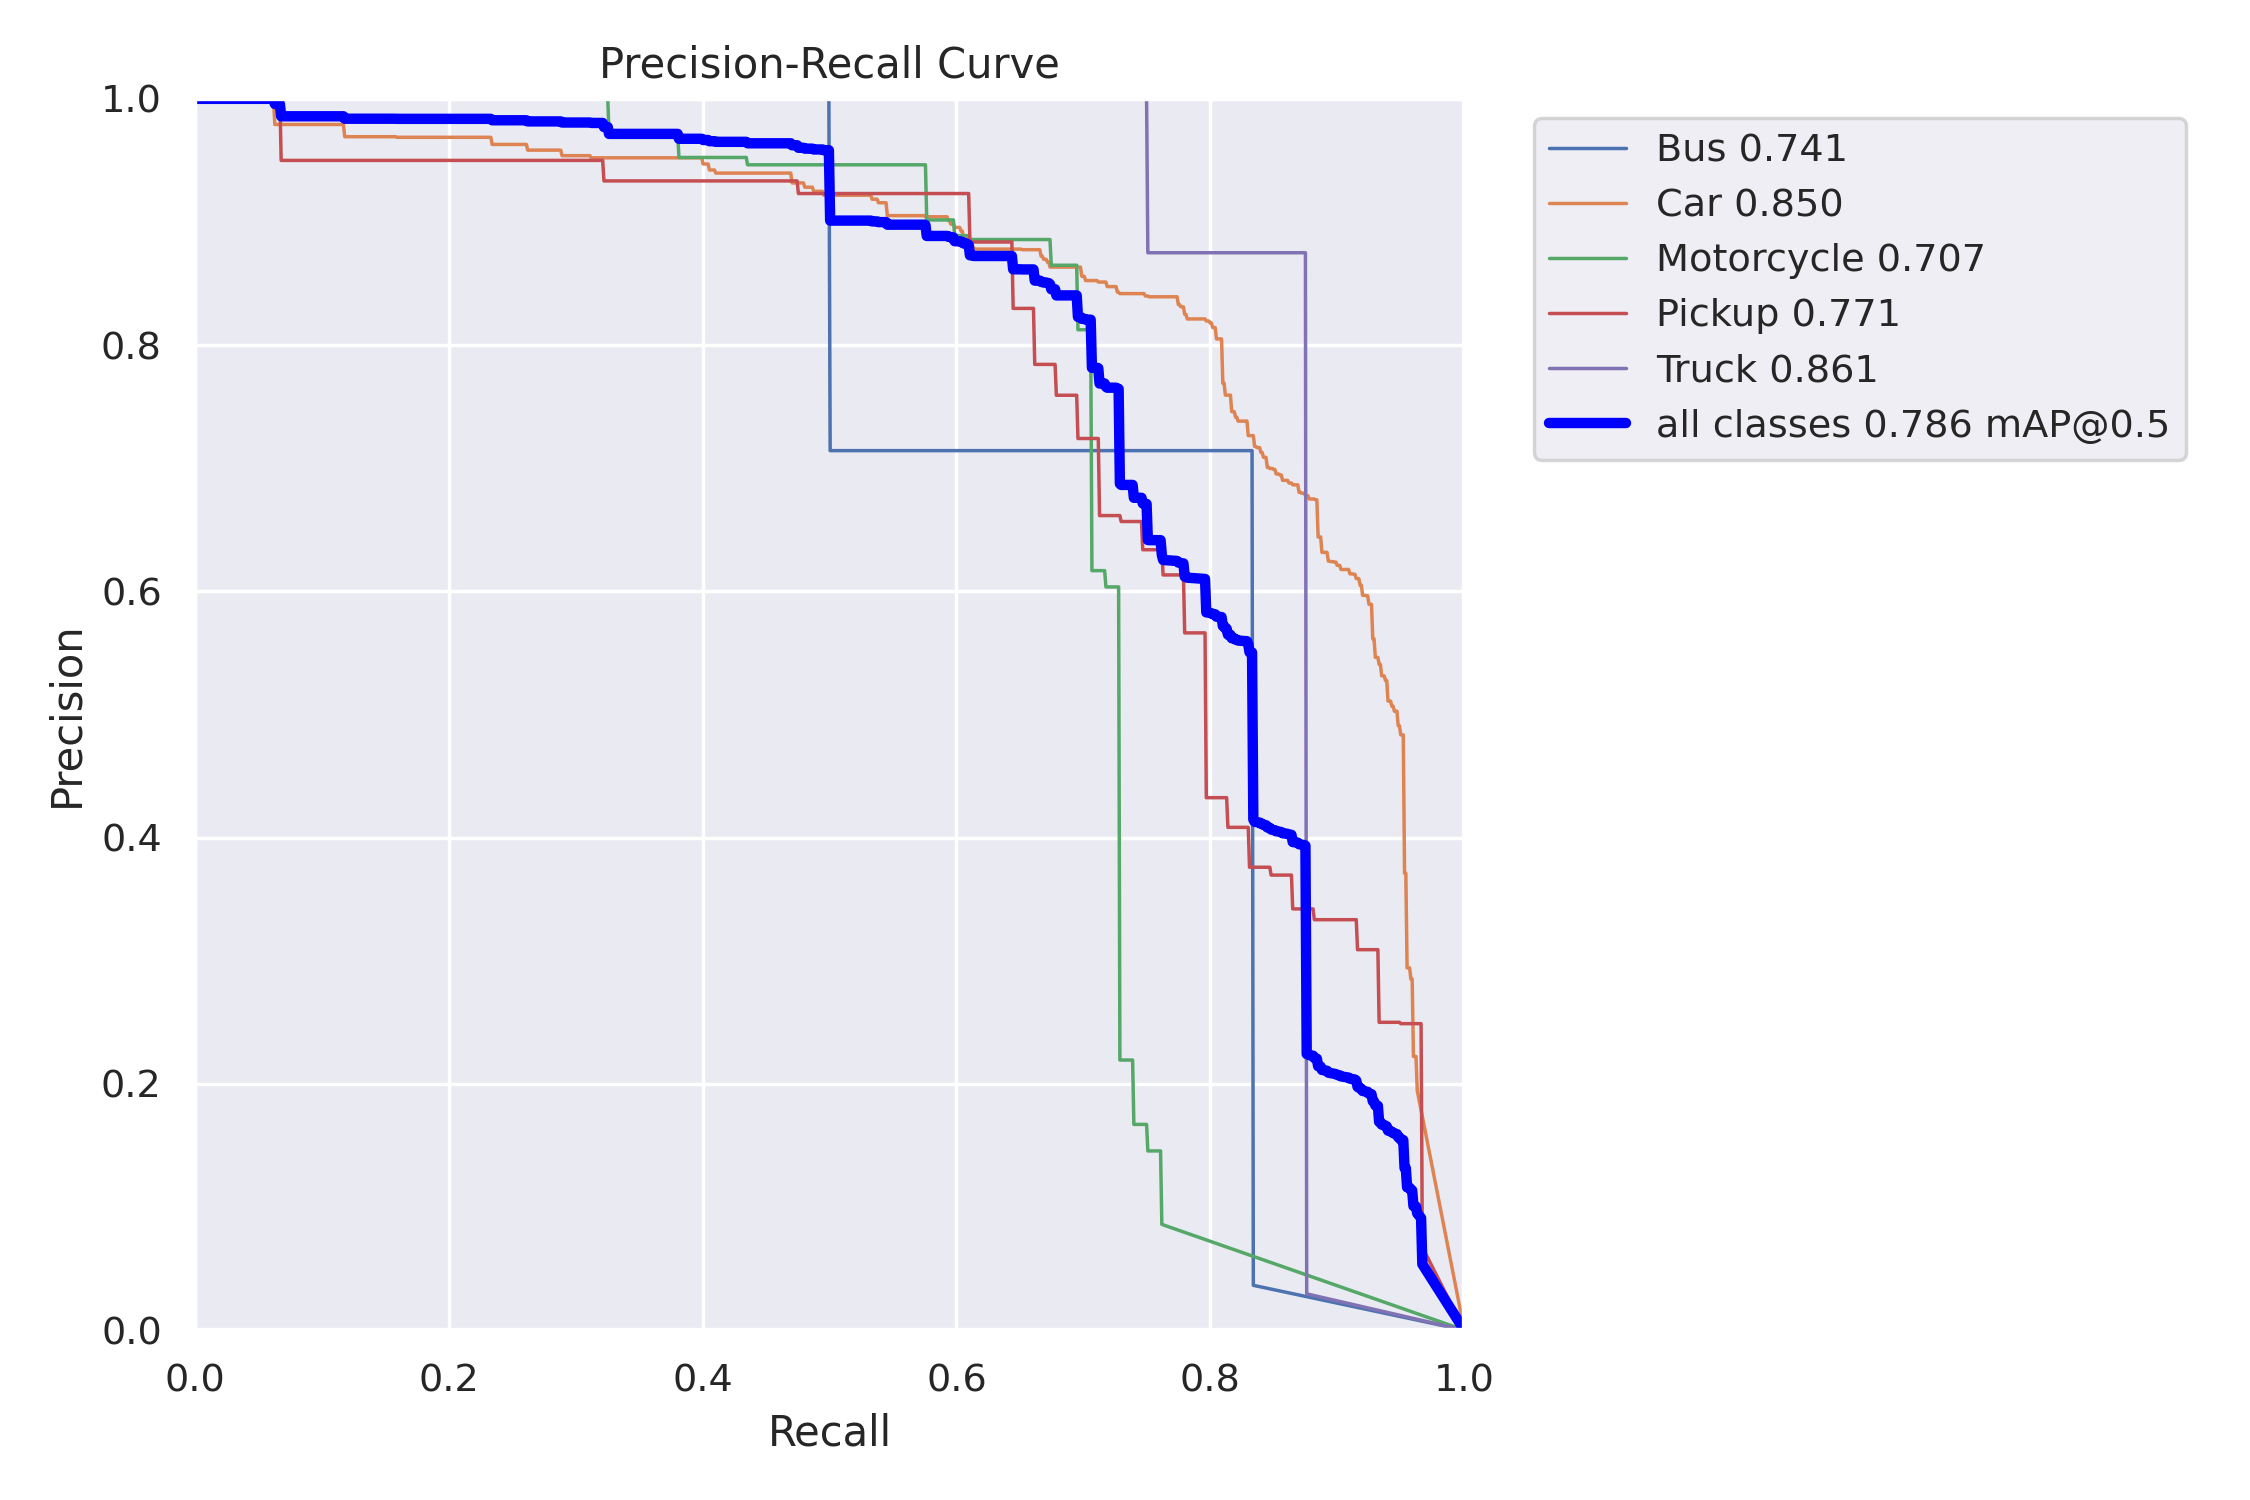

In [ ]:
Image(filename='runs/detect/train6/PR_curve.png', width=600)

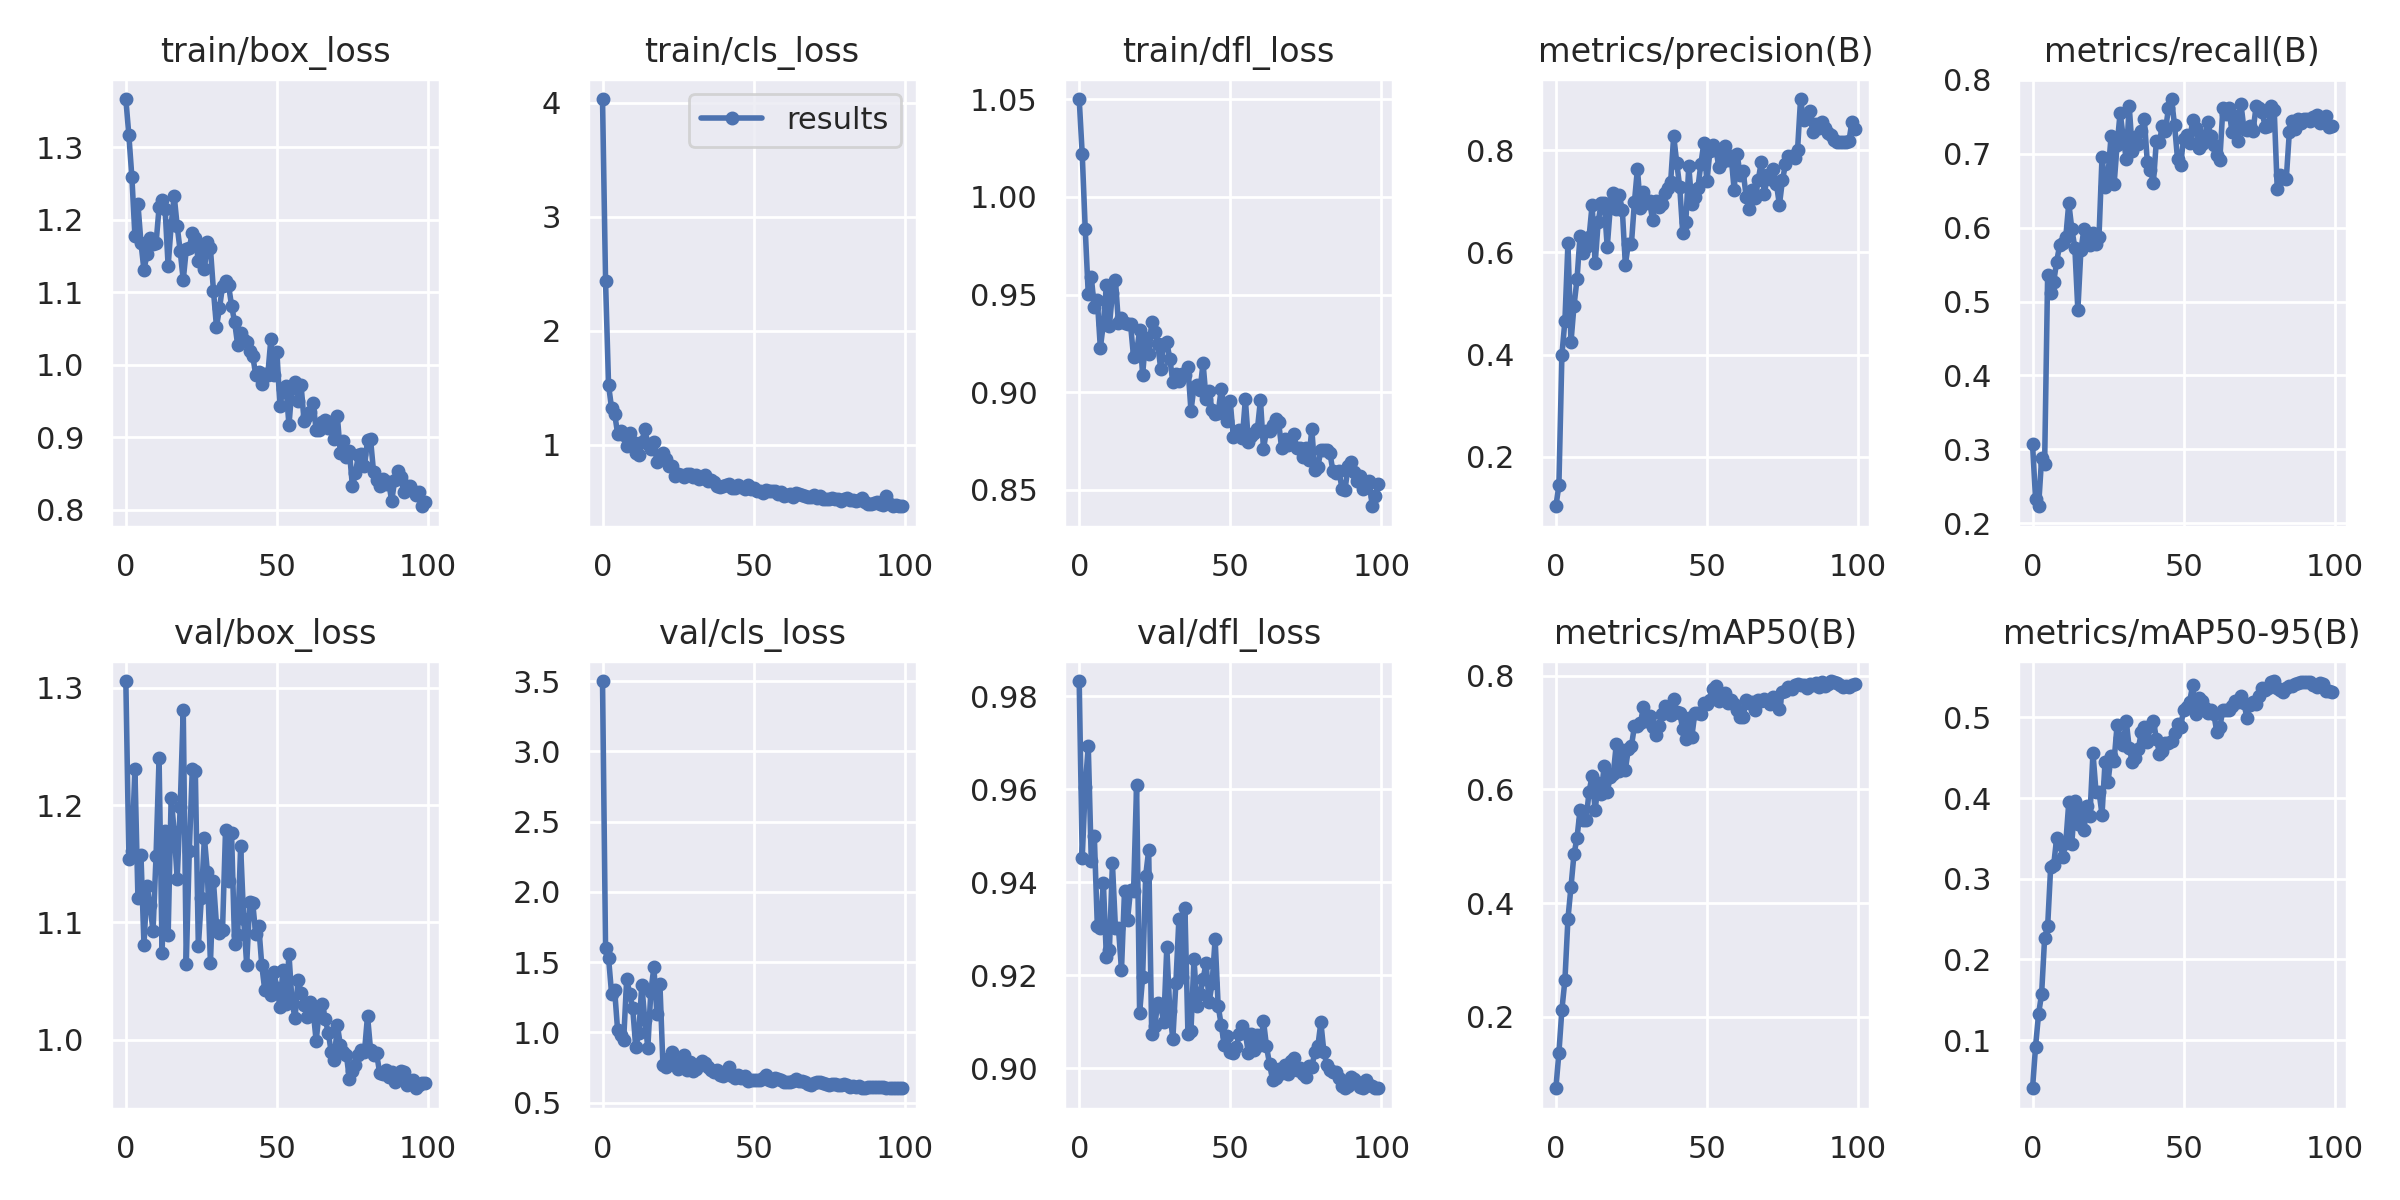

In [ ]:
Image(filename='runs/detect/train6/results.png', width=600)

In [ ]:
#  Export model to tflite

from ultralytics import YOLO

# Load a model
model = YOLO('/content/drive/MyDrive/Vehicles_Detection.v8i.yolov8/yolov8s.pt')  # load a custom trained model

# Export the model
model.export(format='tflite')

yolo.tflite model exported.


In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Run inference on 'bus.jpg' with arguments
model.predict("bus.jpg", save=True, imgsz=320, conf=0.5)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Results saved to runs/detect/predict2


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([4, 6])
 dtype: torch.float32
  + tensor([[4.60000e+01, 3.93000e+02, 2.34000e+02, 9.09000e+02, 8.65402e-01, 0.00000e+00],
         [1.40000e+01, 2.26000e+02, 8.02000e+02, 7.54000e+02, 7.93001e-01, 5.00000e+00],
         [2.21000e+02, 4.03000e+02, 3.50000e+02, 8.54000e+02, 7.38903e-01, 0.00000e+00],
         [6.69000e+02, 3.74000e+02, 8.10000e+02, 8.73000e+02, 6.61143e-01, 0.00000e+00]])]

In [ ]:
# Export a YOLOv8n PyTorch model to TFLite format
yolo export model=yolov8n.pt format=tflite  # creates 'yolov8n_float32.tflite'

# Run inference with the exported model
yolo predict model='yolov8n_float32.tflite' source='https://tinyurl.com/59a6jyyr'

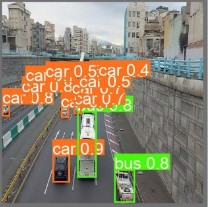